In [235]:
import cv2
import matplotlib.pyplot as plt
import imageio
from scipy.fftpack import fftn, ifftn, fftshift
import numpy as np
from scipy.signal import wiener
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField
plt.rcParams["figure.figsize"] = (20,15) 

In [2]:
p= np.random.uniform(low=1e-05, high=1.1e-05, size=(21,21))
#p[:,:]=1e-05
#p[10,0]=-0.5
#p[0,0]=0.5
#p[20,0]=0.5

ap=np.linalg.inv(p)

In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('GoPro\train\GOPR0372_07_00\blur\000100.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow((im1))

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


C:\Users\jagat\AppData\Local\Temp\ipykernel_3744\2206222869.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im1=imageio.imread('C:\\Users\\jagat\\Desktop\\Masters\\Dissertation Project\\GoPro\\train\\GOPR0372_07_00\\sharp\\000121.png')
C:\Users\jagat\AppData\Local\Temp\ipykernel_3744\2206222869.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im2=imageio.imread('C:\\Users\\jagat\\Desktop\\Masters\\Dissertation Project\\GoPro\\train\\GOPR0372_07_00\\blur\\000121.png')


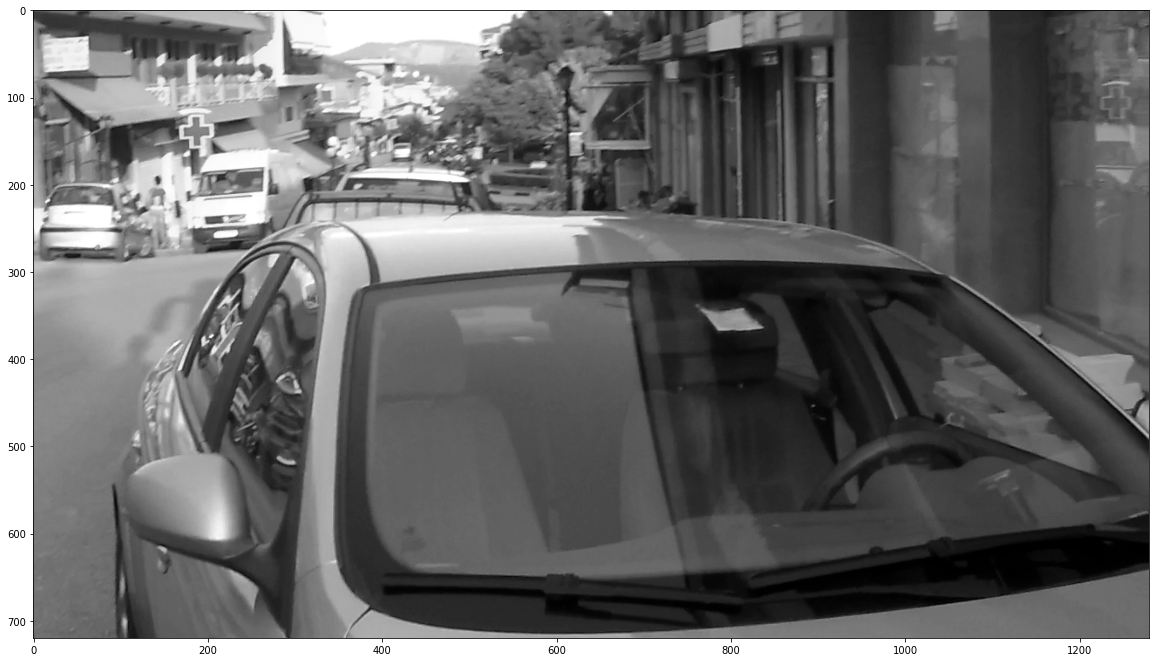

In [227]:
im1=imageio.imread('C:\\Users\\jagat\\Desktop\\Masters\\Dissertation Project\\GoPro\\train\\GOPR0372_07_00\\sharp\\000121.png')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2=imageio.imread('C:\\Users\\jagat\\Desktop\\Masters\\Dissertation Project\\GoPro\\train\\GOPR0372_07_00\\blur\\000121.png')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
plt.imshow(im1,cmap='gray')

In [249]:
kl=100
acv1=(im1[20,:])
acv2=(im2[20,:])
transformer1 = MarkovTransitionField(image_size=kl/im1.shape[1],strategy='uniform', overlapping=True)
transformer2 = GramianAngularField(image_size=kl/im2.shape[1],method='difference',overlapping=True)
p=transformer1.transform(acv1.reshape(1,-1))
q=transformer1.transform(acv2.reshape(1,-1))

In [250]:
acv2=(im2[0,:])

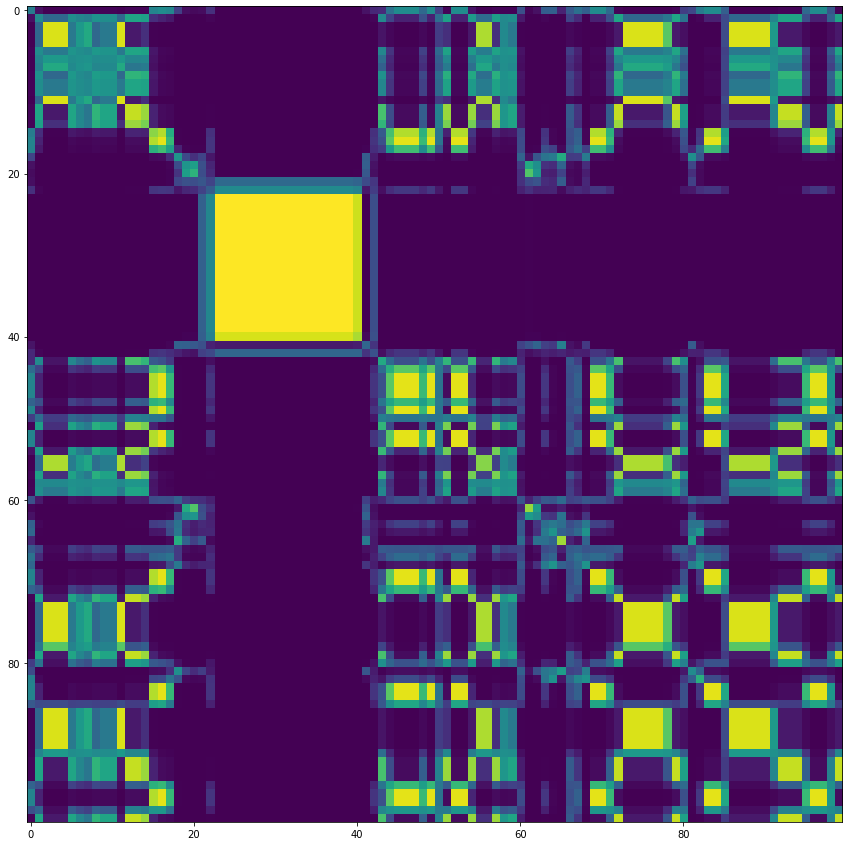

In [251]:
plt.imshow(p.reshape(kl,kl))

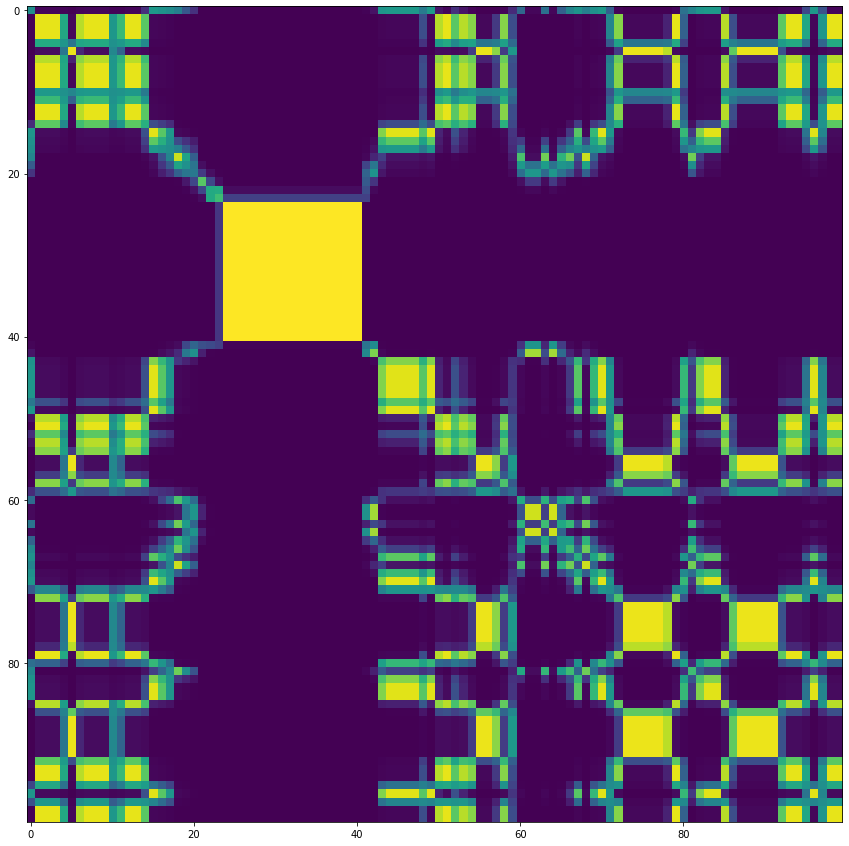

In [252]:
plt.imshow(q.reshape(kl,kl))

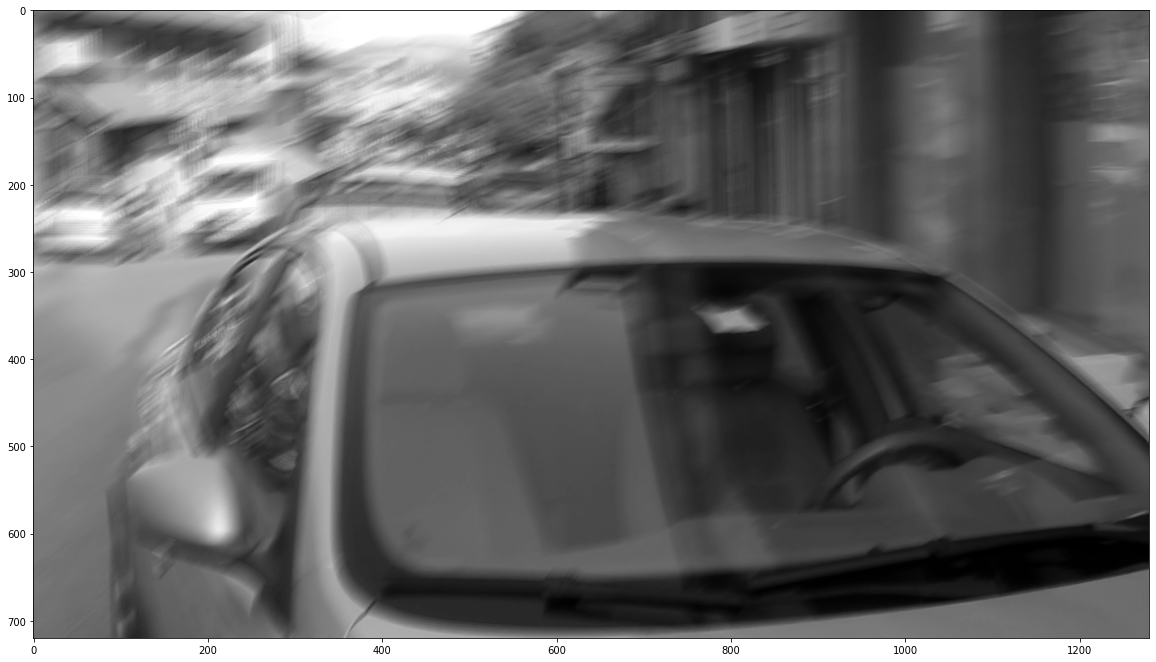

In [228]:
plt.imshow(im2,cmap='gray')

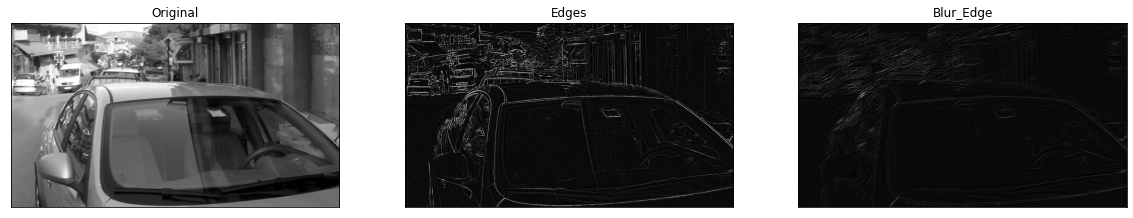

In [213]:
edges = cv2.Laplacian(im1, -1, ksize=3, scale=1.5, delta=10, 
                        borderType=cv2.BORDER_DEFAULT)
edges2 = cv2.Laplacian(im2, -1, ksize=3, scale=1.5, delta=10, 
                        borderType=cv2.BORDER_DEFAULT)
output = [im1, edges, edges2]
titles = ['Original', 'Edges', 'Blur_Edge']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(output[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


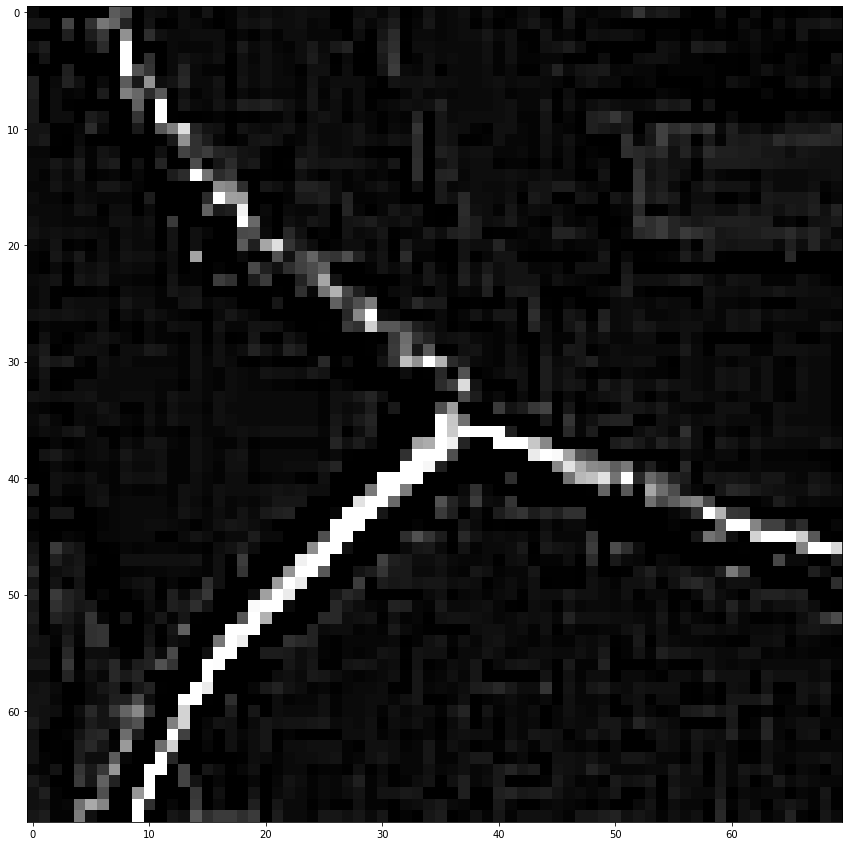

In [214]:
plt.imshow(edges[650:720,350:420],cmap='gray')

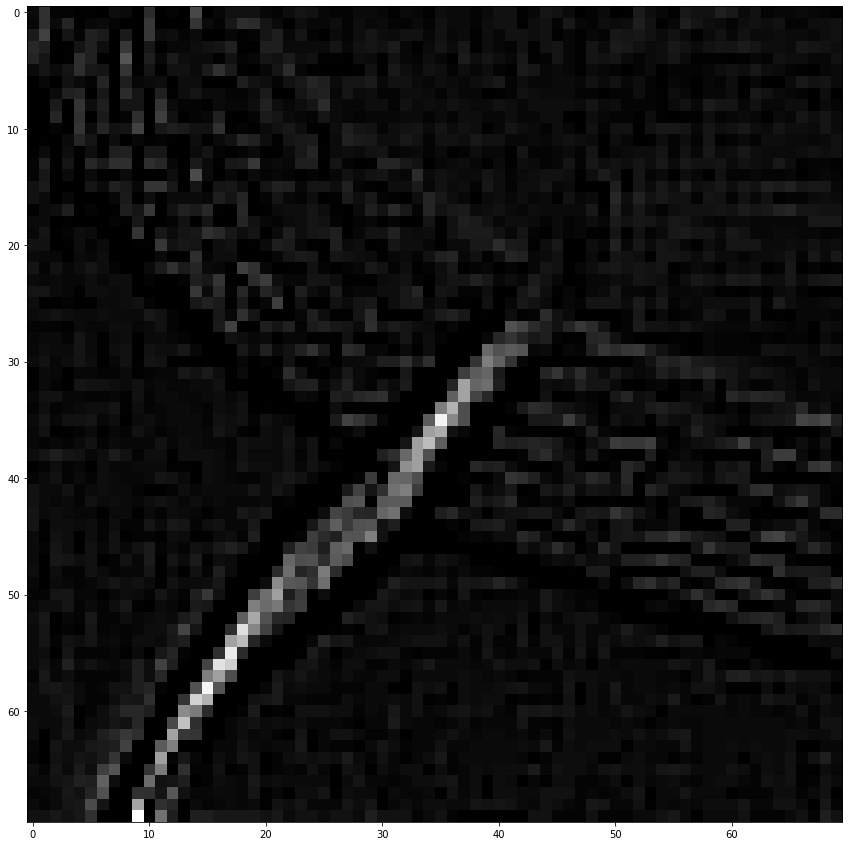

In [215]:
plt.imshow(edges2[650:720,350:420], cmap='gray')

(array([[606.,  65.,  11., ...,   0.,   0.,   2.],
        [596.,  84.,  25., ...,   0.,   0.,   1.],
        [636.,  57.,  11., ...,   1.,   0.,   2.],
        ...,
        [619.,  63.,  20., ...,   2.,   1.,   2.],
        [613.,  71.,  15., ...,   1.,   0.,   3.],
        [608.,  70.,  18., ...,   2.,   2.,   5.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 1280 BarContainer objects>)

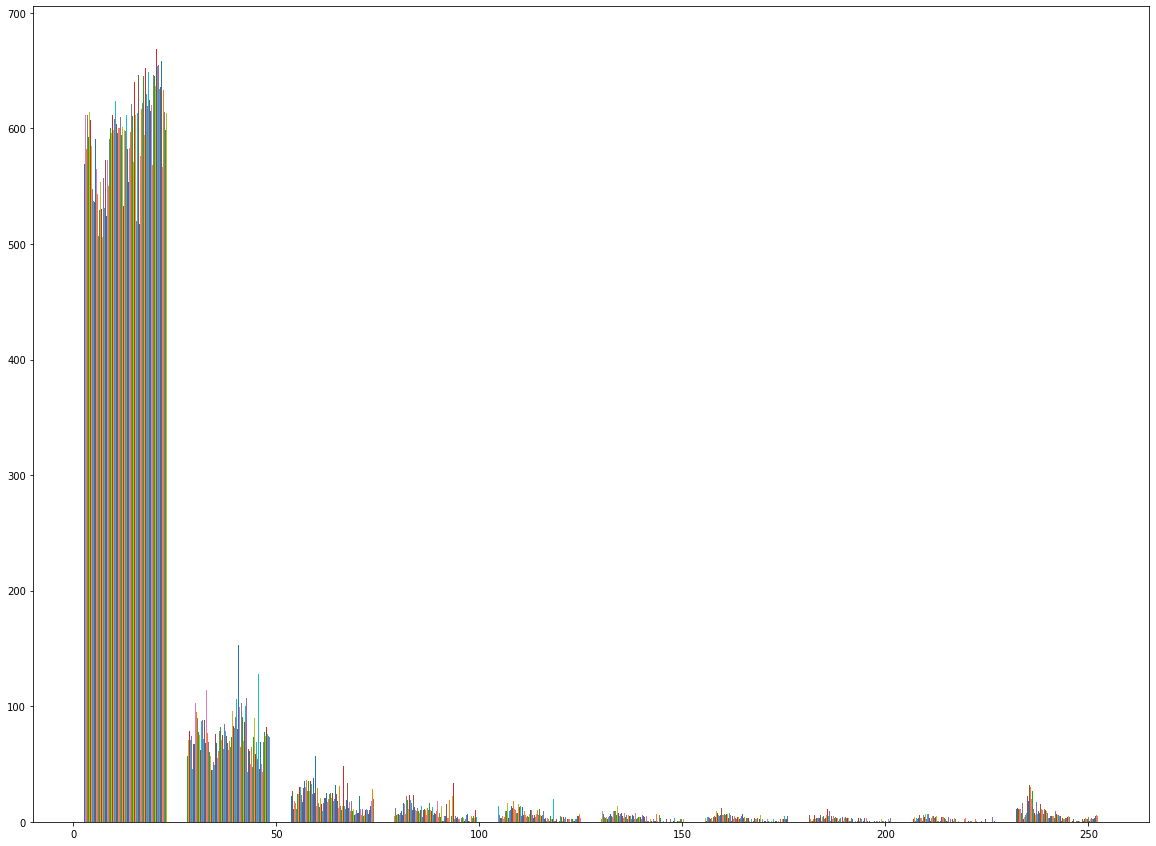

In [216]:
plt.hist(edges)

(array([[681.,  27.,   7., ...,   0.,   0.,   0.],
        [630.,  74.,  13., ...,   0.,   0.,   0.],
        [660.,  47.,   9., ...,   0.,   0.,   0.],
        ...,
        [679.,  24.,  11., ...,   0.,   0.,   0.],
        [680.,  28.,   9., ...,   0.,   0.,   0.],
        [648.,  50.,  15., ...,   0.,   0.,   0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 1280 BarContainer objects>)

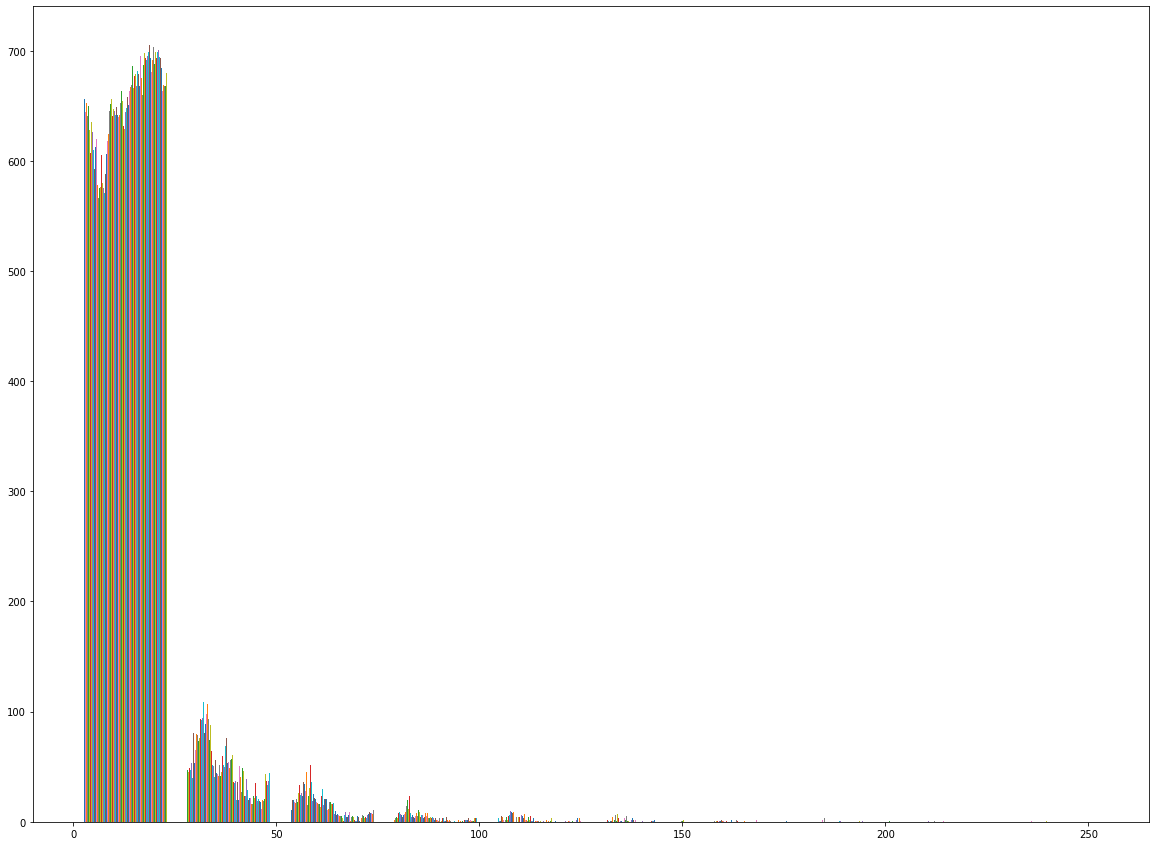

In [217]:
plt.hist(edges2)

In [220]:
print(np.mean(im1),np.mean(im2),np.std(im1),np.std(im2))

96.29891710069444 96.37571072048611 56.07387788009096 52.23058749484771


In [218]:
print(np.mean(edges),np.mean(edges2),np.std(edges),np.std(edges2))

18.619679904513887 12.752344835069444 34.64760364641697 14.977635252645763


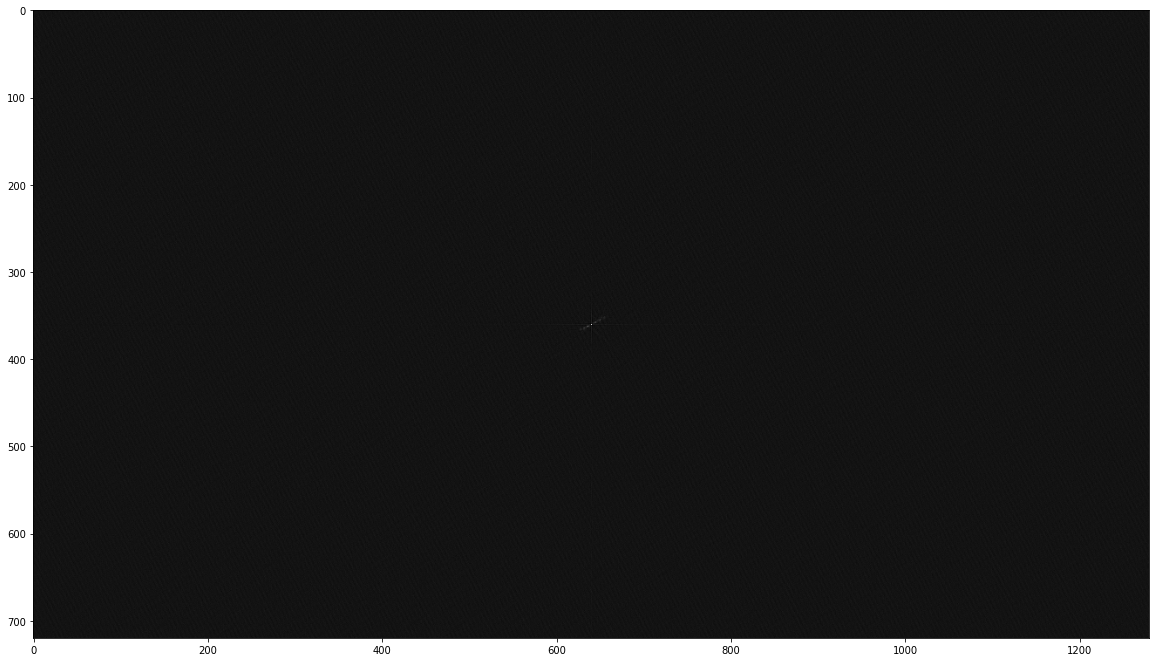

In [221]:
F = fftn(im1)
G = fftn(im2)
H = np.divide(G,F)
G.shape
az=fftshift(ifftn(H).real)
az=az*255/np.max(az)
#az=az.astype(int)
plt.imshow(az,cmap='gray')

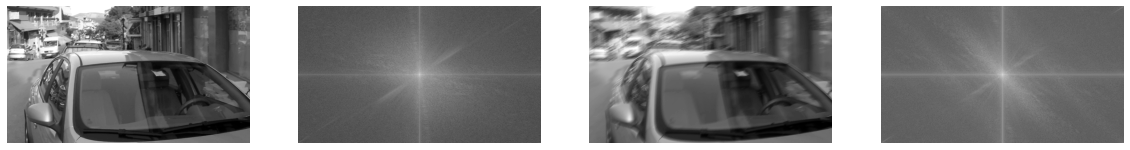

In [263]:
import numpy as np
import matplotlib.pyplot as plt
image_filename = "Earth.png"
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

plt.set_cmap("gray")
ft = calculate_2dft(im1)
plt.subplot(141)
plt.imshow(im1)
plt.axis("off")
plt.subplot(142)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
ft = calculate_2dft(im2)
plt.subplot(143)
plt.imshow(im2)
plt.axis("off")
plt.subplot(144)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()

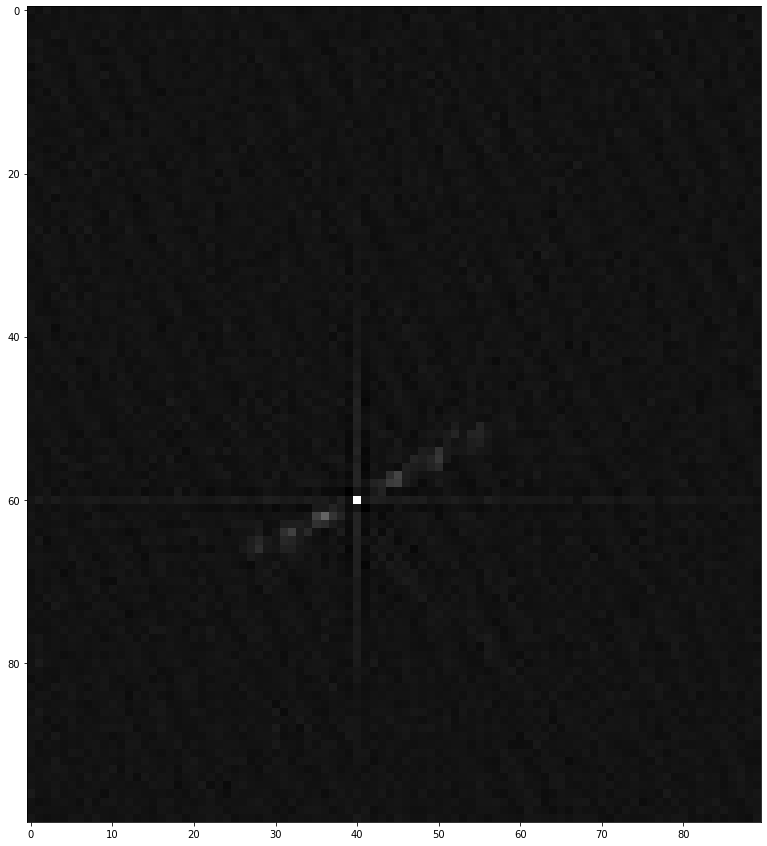

In [225]:
plt.imshow(az[300:400,600:690],cmap='gray')

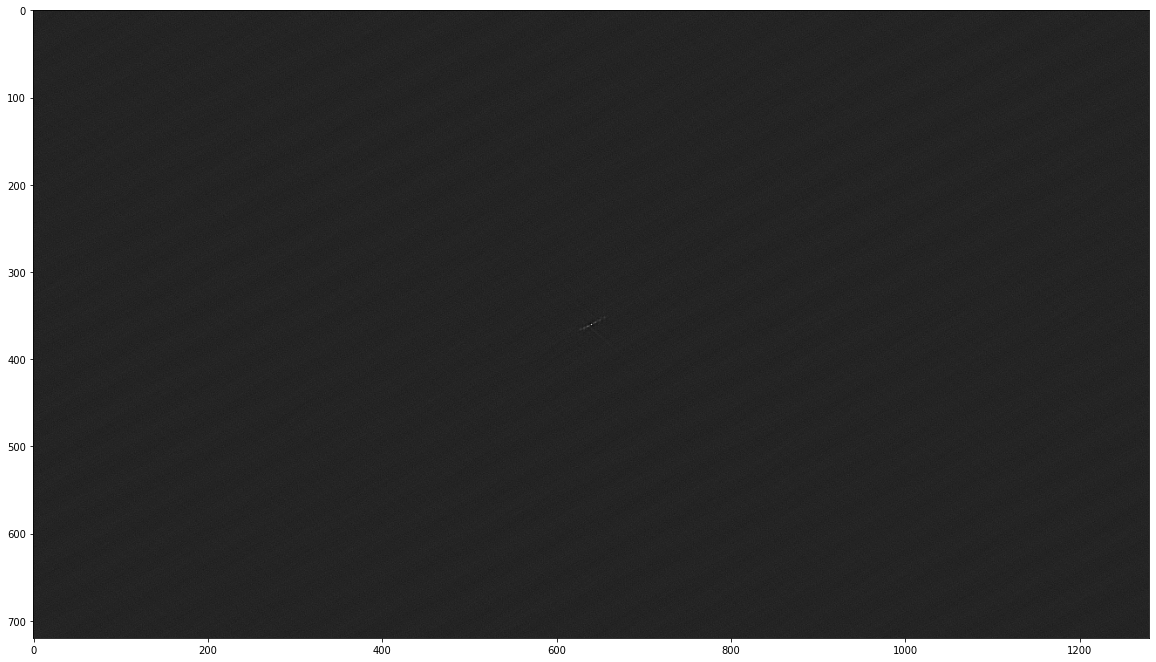

In [222]:
F = fftn(edges)
G = fftn(edges2)
H = np.divide(G,F)
G.shape
az1=fftshift(ifftn(H).real)
az1=az1*255/np.max(az1)
#az1=az1.astype(int)
plt.imshow(az1,cmap='gray')

In [188]:
az==azz

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [186]:
azz=az

In [163]:
F = fftn(im1)
G = fftn(im2)
H = np.divide(G,F)
G.shape
az=fftshift(ifftn(H).real)
az=az*255/np.max(az)
#az=az.astype(int)
plt.imshow(az,cmap='gray')

ValueError: operands could not be broadcast together with shapes (173,293) (172,293) 

218.23819350742122 218.467458422932
64.70977915890218 62.74990615528726


(array([[  0.,   0.,   0., ...,   0.,   0., 172.],
        [  0.,   0.,   0., ...,   0.,   0., 172.],
        [  0.,   0.,   0., ...,   0.,   0., 172.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0., 172.],
        [  0.,   0.,   0., ...,   0.,   0., 172.],
        [  0.,   0.,   0., ...,   0.,   0., 172.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 293 BarContainer objects>)

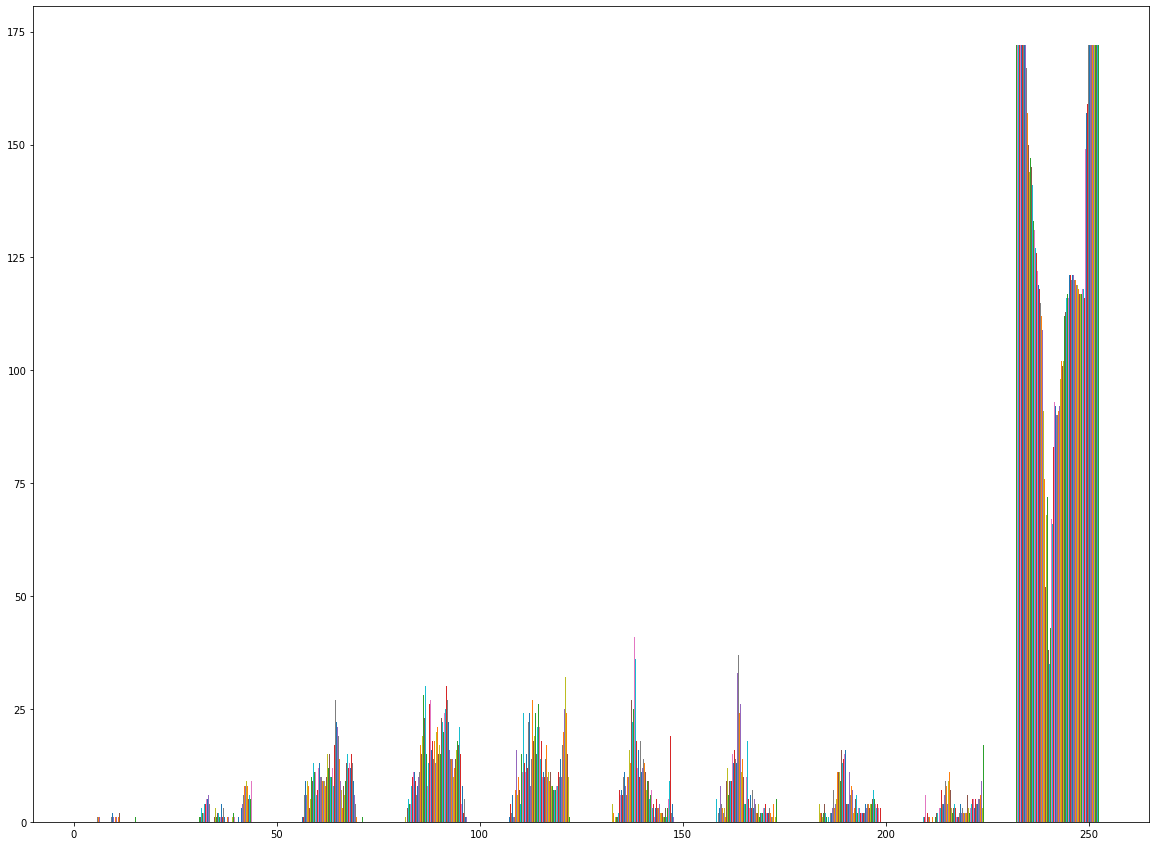

In [164]:
print(np.mean(im1),np.mean(im2))
print(np.std(im1),np.std(im2))
plt.hist(im1)

In [165]:
im1.shape

(172, 293)

(array([[  0.,   0.,   0., ...,   0.,   0., 173.],
        [  0.,   0.,   0., ...,   0.,   0., 173.],
        [  0.,   0.,   0., ...,   0.,   0., 173.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0., 173.],
        [  0.,   0.,   0., ...,   0.,   0., 173.],
        [  0.,   0.,   0., ...,   0.,   0., 173.]]),
 array([ 30. ,  52.5,  75. ,  97.5, 120. , 142.5, 165. , 187.5, 210. ,
        232.5, 255. ]),
 <a list of 293 BarContainer objects>)

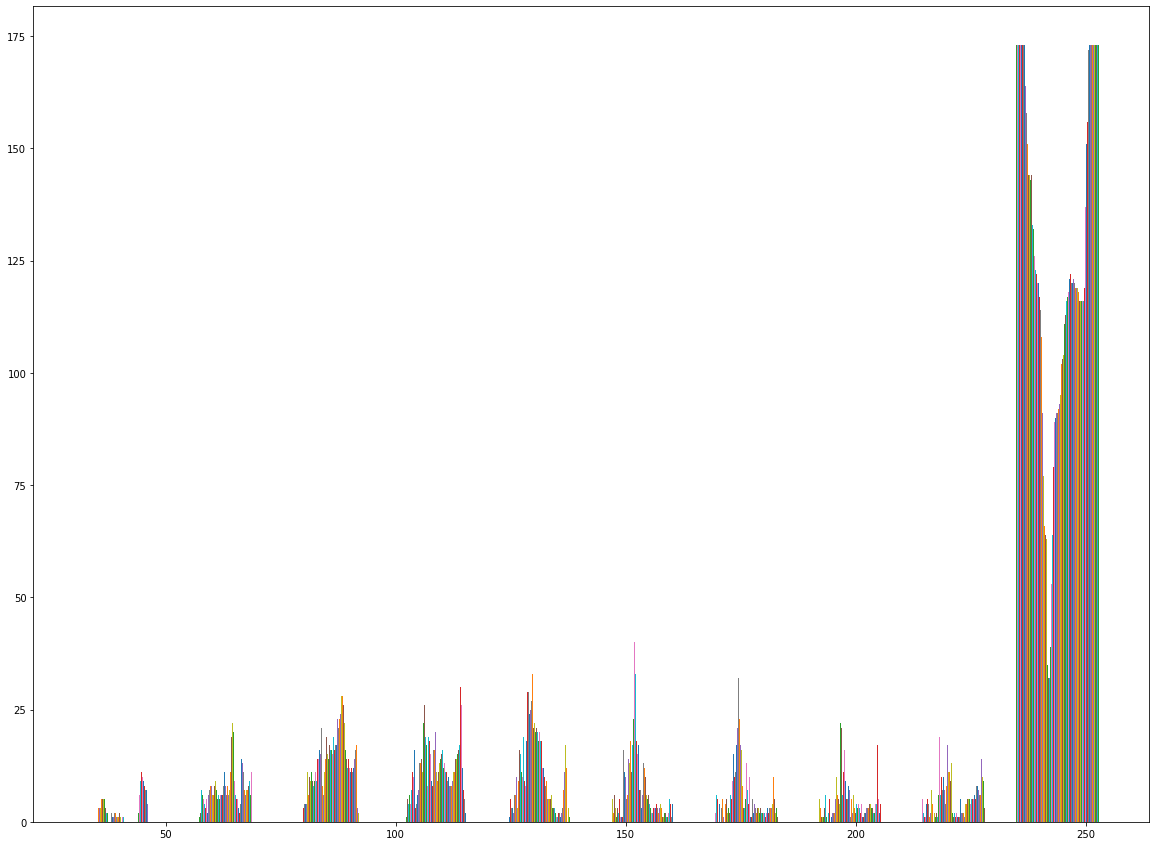

In [166]:
plt.hist(im2)

In [149]:
np.max(az)

255.00000000000003

In [115]:
az.shape

(720, 1280, 3)

In [4]:
def gaussian_filter(k=5, sigma=1.0):
    ''' Gaussian filter
    :param k: defines the lateral size of the kernel/filter, default 5
    :param sigma: standard deviation (dispersion) of the Gaussian distribution
    :return matrix with a filter [k x k] to be used in convolution operations
    '''
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y, z = np.meshgrid(arx, arx, [-1,0,1])
    filt = np.exp(-(1/2) * (np.square(x) + np.square(y) + np.square(z)) / 2*np.square(sigma))
    return filt / np.sum(filt)

#f = imageio.imread("og.jpg")
h = gaussian_filter(k=7, sigma=2.5)
h.shape

(7, 7, 3)

C:\Users\jagat\AppData\Local\Temp\ipykernel_3744\1642332018.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  f = imageio.imread("lena.jpg")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'degraded/blurred image')

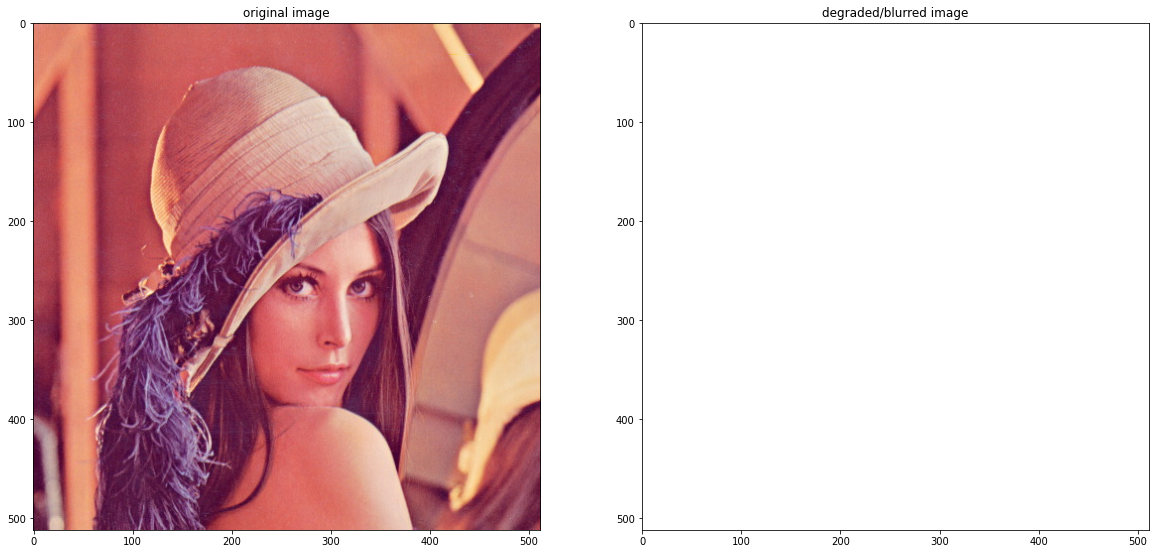

In [5]:
f = imageio.imread("lena.jpg")
h = gaussian_filter(k=7, sigma=0.9)
#h = p/np.sum(p)
# computing the number of padding on one side
a = int(f.shape[0]//2 - h.shape[0]//2)
npad = ((a-1, a), (a, a-1), (0,0))
h_pad = np.pad(h, npad, )

# computing the Fourier transforms
F = fftn(f)
H = fftn(h_pad)
G = np.multiply(F,H)

# Inverse Transform
# - we have to perform FFT shift before reconstructing the image in the space domain
g = fftshift(ifftn(G).real)

plt.subplot(121)
plt.imshow(f); plt.title("original image")
plt.subplot(122)
plt.imshow(g); plt.title("degraded/blurred image")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'restored image')

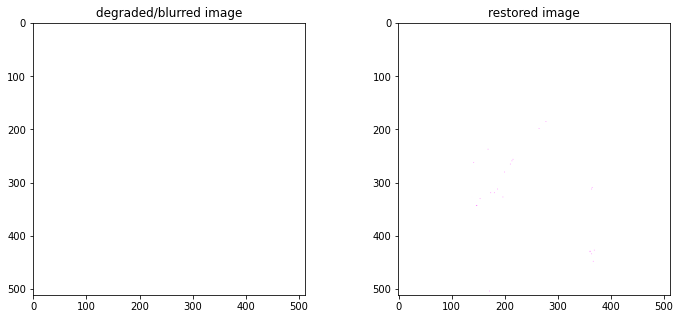

In [6]:
#F_hat = G/H
F_hat = np.divide(G,H)

f_hat = ifftn(F_hat).real

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("degraded/blurred image")
plt.subplot(122)
plt.imshow(f_hat, cmap="gray", vmin=0, vmax=255); plt.title("restored image")

In [69]:

#kernel = np.ones((7, 7), np.float32)/49
a=np.array([[0, 0.1, 0.3, 0.5, 0.7], [0.1, 0.3, 0.5, 0.7, 0.9], [0.3, 0.5, 0.7, 0.9, 1.1], [0.5,0.7,0.9,1.1,1.3], 
            [0.7,0.9,1.1,1.3,3]])
kernel =  a/np.sum(a)
dst = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img, (25, 25))
gblur = cv2.GaussianBlur(img, (25, 25), 0)
median = cv2.medianBlur(img, 9)
bilateralFilter = cv2.bilateralFilter(img, 5, 5, 50)

titles = ['image', '2D Convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
images = [img, dst, blur, gblur, median, bilateralFilter]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

error: OpenCV(4.6.0) D:/a/opencv-python/opencv-python/opencv/modules/imgproc/src/filter.simd.hpp:3297: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=20), and destination format (=20) in function 'cv::opt_AVX2::getLinearFilter'


In [70]:
edges = cv2.Laplacian(img, -1, ksize=5, scale=1.5, delta=10, 
                        borderType=cv2.BORDER_DEFAULT)
output = [img, edges]
titles = ['Original', 'Edges']
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()



error: OpenCV(4.6.0) D:/a/opencv-python/opencv-python/opencv/modules/imgproc/src/filter.simd.hpp:3045: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=20), and buffer format (=21) in function 'cv::opt_AVX2::getLinearRowFilter'


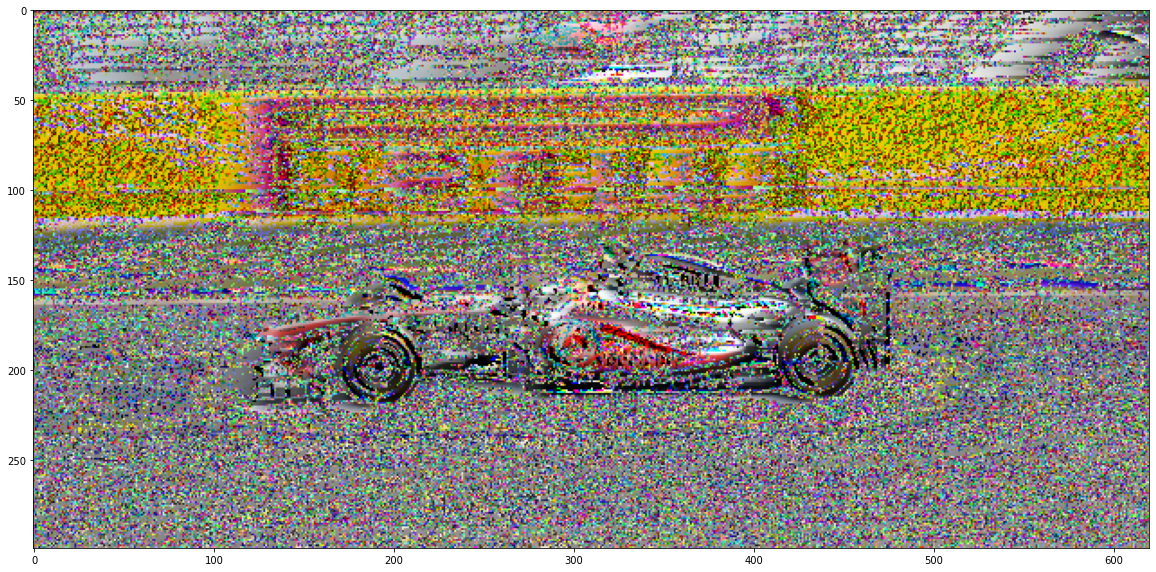

In [23]:
ab=np.multiply(median,edges+1)
plt.imshow(ab)#cv2.GaussianBlur(ab, (9,9),0))

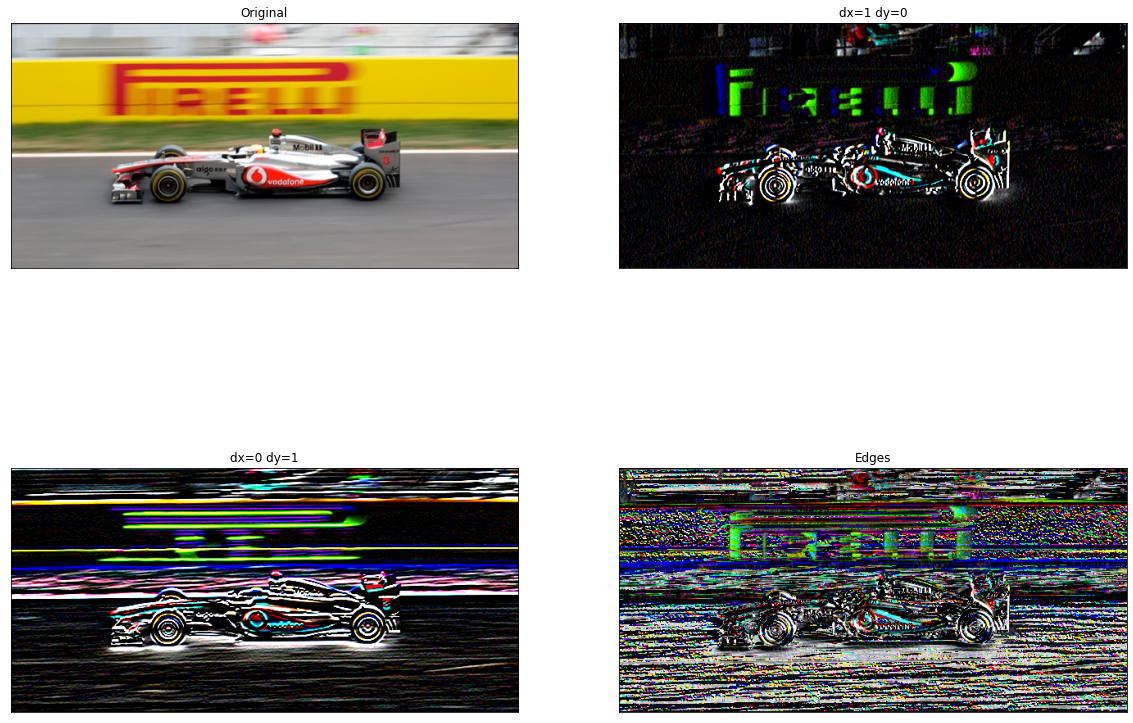

In [10]:
edgesx = cv2.Scharr(img, -1, dx=1, dy=0, scale=1,
                       delta=0, borderType=cv2.BORDER_DEFAULT)
edgesy = cv2.Scharr(img, -1, dx=0, dy=1, scale=1,
                       delta=0, borderType=cv2.BORDER_DEFAULT)
edges = edgesx - edgesy
output = [img, edgesx, edgesy, edges]
titles = ['Original', 'dx=1 dy=0', 'dx=0 dy=1', 'Edges']
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


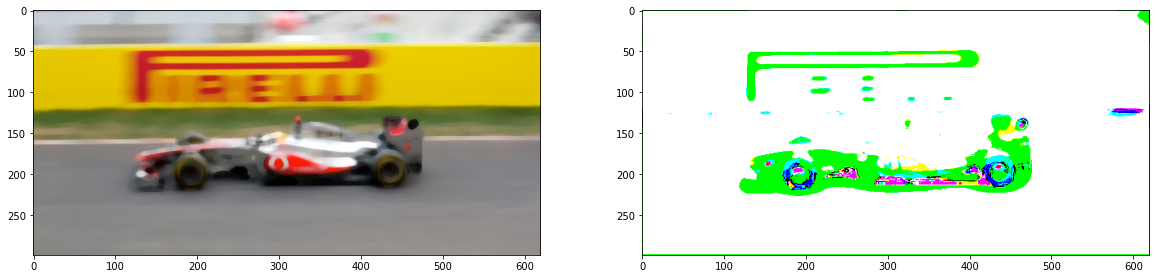

In [13]:
g=(median)
filtered_img1 = wiener(g)
filtered_img = fftshift(ifftn(filtered_img1).real)
f, (plot1, plot2) = plt.subplots(1, 2)
plot1.imshow(median)
plot2.imshow(filtered_img1)
plt.show()

In [12]:
img.shape

(299, 620, 3)